# Lattice Dynamics and Density Functional Perturbation Theory - Quasi-Harmonic Level

The script 'thermodyanmics.py' is a comprehensive module for lattice dynamics based on harmonic and quasi-harmonic level of theory. For simplicity, this tutorial is focused only on quasi-harmonic fittings of phonons and thermodynamics of that level. For harmonic part, please refer to 'thermodynamics-QHA'.

## Tests
2 tests are performed based on the same method.

* 0 pressure, 0\~330K equilibrium volumes of Form I paracetamol. Compared with experimental measurements ([C. C. Wilson, *Z. Kristallogr. Cryst. Mater.*, 2000, **215**, 693–701](https://www.degruyter.com/document/doi/10.1524/zkri.2000.215.11.693/html)).  
* 0\~1GPa, 0\~330K thermodynamic properties of Form I paracetamol. As an illustration of the complete output file. 

3 tests are performed to illustrate the compatibility with QHA output and linear expansion coefficients.

* 0\~1GPa, 0\~1000K thermal expansions of corundum. QHA output available on [crystal tutorial website](https://tutorials.crystalsolutions.eu/tutorials/Tutorial_QHA/AL2O3_SC30_QHA.out).  
* 0\~1GPa, 0\~1000K linear thermal expansions of corundum.
* 0\~1GPa, 0\~1000K thermal expansions of corundum. Fitted by Grüneisen model.

Another test is performed to illustrate the fitting of EoS rather than mode-specific fittings

* 0\~1GPa, 0\~330K thermodynamic properties of Form I paracetamol. For comparison with mode-specific options

Mode-specific method explanation:

1. EoS is fitted by DFT energy to get $E_{0}(V)$  
2. Phonon frequency (not angular) is fitted as function of volume $\nu(V)$.  
3. Gibbs free energy $G(T, p)$ is minimized with BFGS algorithm without boundary conditions or L-BFGS-B with boundary conditions.  
4. Constant **volume** specific heat $C_{V}$ is computed without fitting thermal expansions.
5. Isothermal bulk modulus $K_{T}$ is obtained by fitting Helmholtz free energy at constant temperature $F(V; T)$ and taking the second derivative $K_{T}=V\left(\frac{\partial^{2}F}{\partial V^{2}}\right)_{T}$

EoS fitting method explanation:

1. Helmholtz free energy is computed at HA level for each sampled HA system; EoS is fitted according to sampled $F, V$ to get $F(V; T)$
3. $p(V)=-\left(\frac{\partial F}{\partial V}\right)_{T}$ is numerically solved to get the equilibrium volume at given pressure $p_{0}$: $\text{min}(p(V) - p_{0})^{2}$
4. $G(T; p)$ is fitted as polynomial function to get entropy: $S=-\left(\frac{\partial G}{\partial T}\right)_p$
5. Constant **pressure** specific heat $C_{p}$ is computed without fitting thermal expansions.
6. Isothermal bulk modulus $K_{T}$ is obtained without extra fittings.

Grüneisen model explanation:

1. Different from the model implemented in CRYSTAL, Grüneisen parameters are calculated at given temperature and pressure. In the case of CRYSTALpytools, Grüneisen simplified model is equilivalent to `thermo_freq(poly_order=1)`.   
2. An extra set of thermal expansion coefficients $\alpha_{v}$, constant pressure specific heat $C_{p}$ and adiabatic bulk modulus $K_{S}$ are obtained via Grüneisen model, whose attributes are `self.alpha_vgru`, `self.c_pgru` and `self.k_sgru`.

### 0\~330K, 0 pressure thermodynamics
This part is used for comparison with experimental measurements, in order to illustrate effectiveness of QHA method implemented here. 4 $\Gamma$-point phonon calculations of Form I paracetamol with various volumes are used ('QHA' folder in 'data/').

In [1]:
import numpy as np
from CRYSTALpytools.thermodynamics import Quasi_harmonic

file_list = ['data/QHA/f1-m4freq.out', 'data/QHA/f1-p4freq.out',
             'data/QHA/f1-p8freq.out', 'data/QHA/f1-r0freq.out']
tempt = np.array([20, 50, 80, 150, 200, 250, 330], dtype=float)

press = np.linspace(0, 1, 5)

qha = Quasi_harmonic(filename='data/f1-thermo-QHA.dat').from_HA_files(file_list)
qha.thermo_freq(temperature=tempt, pressure=press, eos_method='birch_murnaghan', 
                poly_order=[2, 3], min_method='BFGS')

/home/e89/e89/hyz20ic/app/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/thermodynamics.py:901: UserWarning: Close overlap of phonon modes detected at qpoint 0: 153 overlaps out of 240*240 mode combinations at this point.
  self.combined_mode, close_overlap = self._combine_data(ha_list, mode_sort_tol=mode_sort_tol)
/tmp/ipykernel_254965/3197406120.py:11: UserWarning: Optimised volume exceeds the sampled range. Special care should be taken of.
  Volume:     731.3771, Temperature:  20.00, Pressure:   0.50

  qha.thermo_freq(temperature=tempt, pressure=press, eos_method='birch_murnaghan',
/tmp/ipykernel_254965/3197406120.py:11: UserWarning: Optimised volume exceeds the sampled range. Special care should be taken of.
  Volume:     727.0594, Temperature:  50.00, Pressure:   0.50

  qha.thermo_freq(temperature=tempt, pressure=press, eos_method='birch_murnaghan',
/tmp/ipykernel_254965/3197406120.py:11: UserWarning: Optimised volume exceeds the sampled range. Special c

Warning messages are printed out since the fitted volume data exceeds the sampled volume data, which might cause inaccuracies due to the extrapolated volume & phonon frequencies. According to warning messages, smaller volumes should be sampled when generating the phonon frequency data. However, tests show that moderate extrapolation tend to not severely deteriorate the results, therefore, a warning, instead of an error, is used.

No warning message is printed out for 0 pressure thermodynamics. Fitted data and expermiental data are plotted for comparison in the following code block. The difference is <= 5 cm^3/mol, which is a good agreement with experimental measurements. The increased thermal expansion around 50\~150K is reproduced.

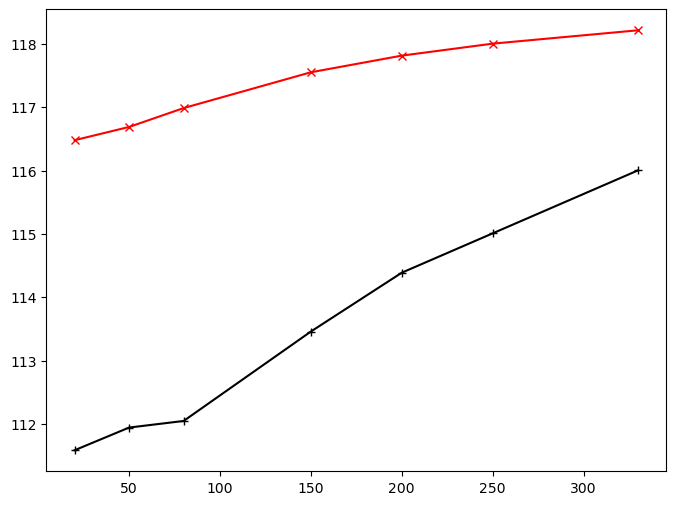

In [2]:
import matplotlib.pyplot as plt

exp = np.array([111.5836, 111.9421, 112.0463, 113.4580, 114.3871, 
                115.0082, 116.0031])
qha_zerop = qha.volume[0, :]
# Angstrom^3 to cm^3/mol
qha_zerop = qha_zerop * 0.602214 / 4
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(tempt, exp, '+-k')
ax.plot(tempt, qha_zerop, 'x-r')
fig.show()

An interactive window might be launched when fitting volumetric thermal expansion coefficients $\alpha_{V}(T, p)$. The equilibrium volumes are fitted as polynomial functions at constant pressure. The user is allowed to examine the quality of fitting by the image printed out and specify the order of polynomials used. Alternatively, by setting `plot=False`, the code automatically select the order that minimizes $R^{2}$. Note that higher $R^{2}$ is not always advantageous considering the overfitting problems.

/home/e89/e89/hyz20ic/app/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/thermodynamics.py:1863: UserWarning: Reference data not sufficient for the order of polynomial fitting.
  warnings.warn('Reference data not sufficient for the order of polynomial fitting.')
/home/e89/e89/hyz20ic/app/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/thermodynamics.py:1864: UserWarning: Too high values will be removed.
  warnings.warn('Too high values will be removed.')


Set the optimal fit:  3


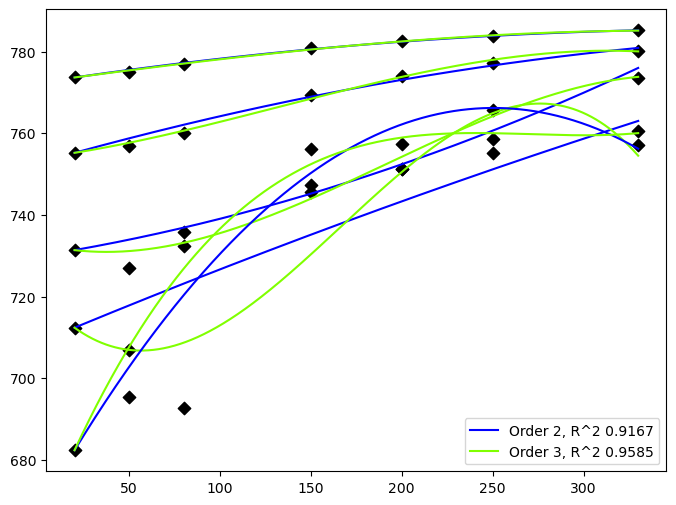

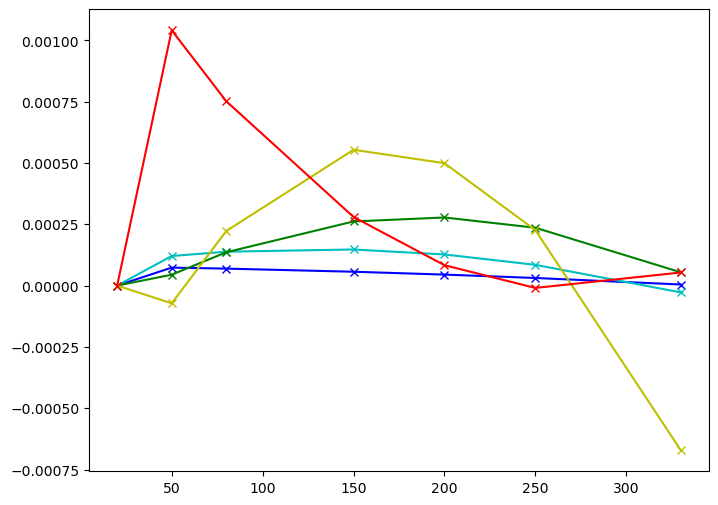

In [3]:
qha.expansion_vol(poly_order=[2, 3, 4], plot=True, fit_fig='data/QHA/expansion_fit.png')

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
style = ['x-b', 'x-c', 'x-g', 'x-y', 'x-r']
for idx_p, p in enumerate(qha.alpha_v):
    ax.plot(tempt, p, style[idx_p])
fig.show()

$\alpha_{V}$ is very off at higher temperatures (red and yellow), which is consistent with the warning messages - QHA method in general has very poor extrapolation performances. 

### 0\~330K, 0\~1GPa thermodyanmics
The format of the output file obtained from the previous calculation (f1-thermo-QHA.dat) is briefly explained in this section. Generally speaking, titles of each section are printed in upper case, with '\#' at the beginning of the line. Brief explanations, if necessary, are given in the following lines in the lower case. 

Following information is reported in sequence:

#### Combined HA phonon data

1. Volumes of sampled HA phonons  
2. DFT total energies of sampled HA phonons  
3. Mode frequencies as functions of volumes

#### Overlaps of phonon modes

Phonon frequencies are sorted to give smooth $\omega(V)$ for polynomial fittings. Reference: [A. Erba, *J. Chem. Phys.*, 2014, **141**, 124115.](https://aip.scitation.org/doi/full/10.1063/1.4896228)

The scalar product of corresponding eigenvectors normalized to 1 between two calculations (Calc 1 and 2) should not be smaller than 0.4.

Calc_Ref: The previous calculation, Calc 1

Calc_Sort: The next calculation, Calc 2

```
## CLOSE OVERLAPS OF PHONON FREQUENCIES

### CLOSE OVERLAPS AT QPOINT #

  Calc_Ref  Mode_Ref  Calc_Sort  Mode_Sort
```

#### Equation of states fitted for DFT total energy
To get the analytical expression of internal energy as the function of volume, U(V), excluding the zero point energy, the DFT total energy is fitted to equation of states (EoS) specified. The [pymatgen.analysis.eos module](https://pymatgen.org/pymatgen.analysis.eos.html) is integrated, so EoSs supported there are supported here as well. 

The following parameters are fitted:

1. $E_{0}$, The equilibrium internal energy excluding phonon vibrations.  
2. $V_{0}$, The equilibrium volume fitted to minimize the internal energy. Compared to $V_{0}$ that minimizes Gibbs free energy, there is a famous 'volume shift' problem of this value.  
3. $B_{0}$, The equilibrium bulk modulus.  
4. $B_{1}=\left(\frac{\partial B_{0}}{\partial p}\right)_{T}$

#### Polynomial fit of phonon frequency
The polynomial fitting of phonon frequency as the function of volume based on perturbation, $\Delta\omega(V-V_{0})$, is implemented. 

Two sub-sections are printed. The first sub-section is printed during the fitting. The following parameters are printed for future evaluation:

1. Mode number  
2. Order of polynomial  
3. The fitting goodness R^2. $r^{2}=1-\frac{\sigma_{res}}{\sigma_{tot}}=1-\frac{\sum^{n}\left(\omega_{i}^{0}-\omega_{i}^{fit}\right)^{2}}{\sum^{n}\left(\omega_{i}^{0}-\bar{\omega^{0}}\right)^{2}}$  
4. Coefficients of the polynomial. Listed from left to the right from the 0-order term to the highest order term

The second sub-section is printed out after finishing all the fittings. The overall fitting goodness (the average of R^2 of all modes) at each q point is collected for comparison. 

```
## POLYNOMIAL FIT GOODNESS AT QPOINT #       
  Order           R^2
```

#### QHA thermodynamic properties

Basic thermodynamic properties including equilibrium volumes $V(T,p)$, Helmholtz free energy $F(T,V)$, Gibbs free energy $G(T,p)$, entropy $S(T,V)$ and isothermal bulk modulus $K_{T}(T, p)$ are printed out at finite temperatures and pressures. 

The following information is printed out:

1. The order of polynomials used for QHA thermodynamics, which is automatically chosen based on the average R^2.  
2. Algorithm used for minimizing Gibbs free energy.  
3. If applicable, volume boundaries set for Gibbs free energy minimization.  
4. Thermodynamic properties at constant pressure.

$V(T,p)$ is the basic quantity of all the other thermodynamic properties, which is obtained by numerically minimizing the Gibbs free energy of harmonic phonons (see [thermo-HA](https://github.com/crystal-code-tools/CRYSTALpytools/blob/main/tutorial/thermo-HA.ipynb) for analytical equations).

To compute $K_{T}$, the following equation is used:

$K_{T}(p; T) = V\left(\frac{\partial^{2}F(V;T)}{\partial V^{2}}\right)_{T}$

To take the second deritative of $F(V;T)$, Helmholtz free energy of the equilibrium volume $V(p;T)$ is fitted by an equation of state, whose form is consistent with the one used to fit DFT energy. The same procedure is repeated at all the temperatures sampled.

### 0\~1000K, 0\~1GPa thermal expansion of corundum

This test is to illustrate the compability of CRYSTALpytools with QHA output from CRYSTAL. Due to the finite changes in volume, the interation cut-off threshold might change with the geometry, leading to noises on the potential energy surface. See 'FIXINDEX' in CRYSTAL manual. Therefore, to obtain a smooth energy surface, QHA output, rather than multiple HA outputs, is always preferred. 

In [4]:
import numpy as np
from CRYSTALpytools.thermodynamics import Quasi_harmonic
import matplotlib.pyplot as plt

file = 'data/corundum.out'
tempt = np.linspace(0, 1000, 5)
press = np.linspace(0, 1, 5)

qha = Quasi_harmonic(filename=None).from_QHA_file(file)
qha.thermo_freq(temperature=tempt, pressure=press, eos_method='birch_murnaghan', 
                poly_order=[3], min_method='BFGS')

/home/e89/e89/hyz20ic/app/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/thermodynamics.py:979: UserWarning: Close overlap of phonon modes detected at qpoint 0: 34 overlaps out of 90*90 mode combinations at this point.
  self.combined_mode, close_overlap = self._combine_data(ha_list, mode_sort_tol)


### 0\~1000K, 0\~1GPa thermal expansion of corundum: Grüneisen

This test is to illustrate Grüneisen simplyfied model.

In [5]:
file = 'data/corundum.out'
tempt = np.linspace(0, 1000, 5)
press = np.linspace(0, 1, 5)

gru = Quasi_harmonic(filename='data/al2o3-grun-QHA.dat').from_QHA_file(file)
gru.thermo_gruneisen(temperature=tempt, pressure=press, eos_method='birch_murnaghan', min_method='BFGS')

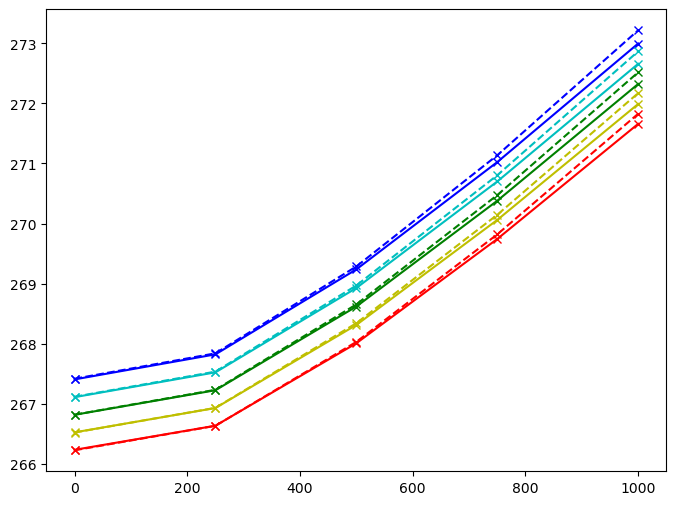

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
style_qha = ['x-b', 'x-c', 'x-g', 'x-y', 'x-r']
style_gru = ['x--b', 'x--c', 'x--g', 'x--y', 'x--r']

for idx_p, v_p in enumerate(qha.volume):
    ax.plot(tempt, v_p, style_qha[idx_p])

for idx_p, v_p in enumerate(gru.volume):
    ax.plot(tempt, v_p, style_gru[idx_p])

fig.show()

### 0\~1000K, 0\~1GPa linear thermal expansion of corundum

This test is to illustrate the fitting of linear expansions by CRYSTALpytools. Different from what has been implemented in CRYSTAL, where lattice parameters are fitted as polynomials of volume, a multi-dimensional 2-order perturbation is adopted.

$$G(\mathbf{p}) = G_{0}(\mathbf{p}_{0}) + \Delta\mathbf{p}^{T}\mathbf{H}\Delta\mathbf{p}$$

$\Delta\mathbf{p}$ is the difference between the lattice parameters of sampled HA calculations and the equilibrium ones (to be fitted). The root-mean-suqared deviation (RMSD) of the following equation is minimized at constant temperature and pressure.

$$\mathbf{p_{0}} = \min\left\{\Delta\mathbf{p}^{T}\mathbf{H}\Delta\mathbf{p} - [G(\mathbf{p})-G_{0}(T,p)]\right\}$$

The RMSD of Gibbs free energy is minimized rather than the volume due to the ambiguity and cost. Slight deviations of the fitted lattice volume and the fitted $V_{0}$ might occur. The RMSD of energy in kJ/mol is available in output file.

This stragety requires more HA calculations than the method implemented in CRYSTAL. The number of HA calculations should follow the equation below, otherwise the warning massage is given.

$$n_{HA} \geq n_{latt} + \sum_{i=1}^{n_{latt}}i$$

$n_{latt}$ is the lenth of the minimial set of lattice parameters. The optimized lattice parameters at DFT level are used for fitting.

In [7]:
qha.expansion_lin()
print(qha.lattice[0]) # 0GPa, 0~1000K expansion. 1st dimension, a, 2nd dimension, c.

/tmp/ipykernel_254965/1943740495.py:1: UserWarning: The number of sampled points is less than number of unknowns. Large deviation is expected.
  qha.expansion_lin()


[[ 4.35981724 11.31973745]
 [ 4.23885508 11.20496565]
 [ 5.39694361 15.20839834]
 [ 5.15918411 14.84583438]
 [ 4.89487304 14.92472662]]


In the current example, $n_{HA}$ is 4 and the recommended number of HA calculations is 5, which leads to numerical problems. By adding 4 interpolated volumes, which are inserted between the maximum and minimum values of resepctive lattice parameters, a smoother curve might be obtained - but not necessarily **CORRECT**. Adding more optimized HA calculations is always preferred.

In [8]:
qha.expansion_lin(interp=4)
print(qha.lattice[0])

[[ 5.6862062  14.97306317]
 [ 5.3467734  15.04009639]
 [ 5.20852637 14.81541524]
 [ 5.11506476 14.80765878]
 [ 5.01370975 14.9557949 ]]


### EoS fitting

This test is to illustrate the procedure to fit a series of adiabatic equation of states to avoid mode-specific fittings and calculations, which might be useful for large systems with low symmetry.

**About EOS input format**

Inputs of EOS is constant with the [PyMatGen.analysis.eos module](https://pymatgen.org/pymatgen.analysis.eos.html), including: 

1. `eos_method` Name of EoS
2. `order` `min_ndata_factor` `max_poly_order_factor` `min_poly_order` Extra parameters of polynomial based EoSs

In [9]:
import numpy as np
from CRYSTALpytools.thermodynamics import Quasi_harmonic
import time

file_list = ['data/QHA/f1-m4freq.out', 'data/QHA/f1-p4freq.out',
             'data/QHA/f1-p8freq.out', 'data/QHA/f1-r0freq.out']
tempt = np.array([20, 50, 80, 150, 200, 250, 330], dtype=float)
press = np.linspace(0, 1, 5)

mode = Quasi_harmonic().from_HA_files(file_list, mode_sort_tol=0.4)
eos = Quasi_harmonic().from_HA_files(file_list, mode_sort_tol=None)

tbg = time.perf_counter()
# Mode-specific
mode.thermo_freq(temperature=tempt, pressure=press,
                 eos_method='birch_murnaghan',
                 poly_order=[3], min_method='BFGS', mutewarning=True)

tmode = time.perf_counter()
# EoS
eos.thermo_eos(temperature=tempt, pressure=press,
               eos_method='birch_murnaghan',
               poly_order=[3], mutewarning=True)

teos = time.perf_counter()
print('Time consumption for Mode-Specific fitting: %12.6f s' % (tmode - tbg))
print('Time consumption for EoS fitting: %12.6f s' % (teos - tmode))

/home/e89/e89/hyz20ic/app/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/thermodynamics.py:901: UserWarning: Close overlap of phonon modes detected at qpoint 0: 153 overlaps out of 240*240 mode combinations at this point.
  self.combined_mode, close_overlap = self._combine_data(ha_list, mode_sort_tol=mode_sort_tol)


Time consumption for Mode-Specific fitting:    17.797765 s
Time consumption for EoS fitting:     0.397547 s


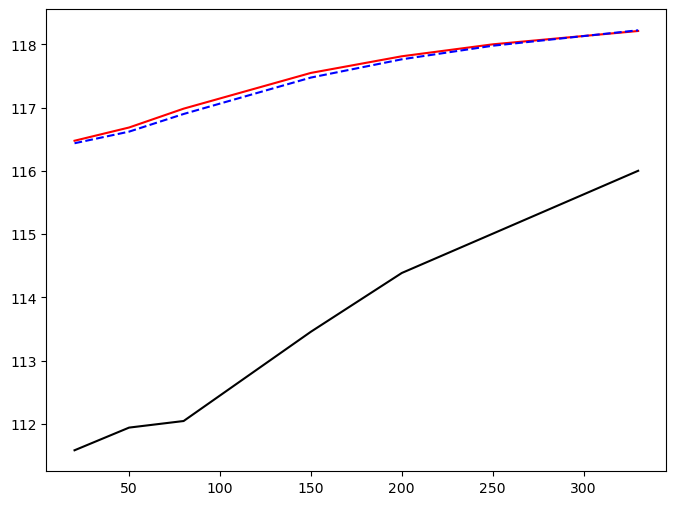

In [10]:
import matplotlib.pyplot as plt

exp = np.array([111.5836, 111.9421, 112.0463, 113.4580, 114.3871, 
                115.0082, 116.0031])
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(tempt, exp, '-k')
# Angstrom^3 to cm^3/mol
vol_mode = mode.volume[0, :] * 0.602214 / 4
vol_eos = eos.volume[0, :] * 0.602214 / 4
ax.plot(tempt, vol_mode, '-r')
ax.plot(tempt, vol_eos, '--b')

fig.show()

It should be noted that entropy $S(V, T)$ is fitted from $S=-\left(\frac{\partial G}{\partial T}\right)_{p}$, making it less accurate compared to mode-specific fittings. See the table below. 

**0 Pressure entropy**

| T (K) | S - $\omega(V)$ (J.mol$^{-1}$.K$^{-1}$)  | S - EoS (J.mol$^{-1}$.K$^{-1}$) | F - $\omega(V)$ ($\times 10^{6}$ kJ.mol$^{-1}$) | F - EoS ($\times 10^{6}$ kJ.mol$^{-1}$)|
|:--- |:------:|:------:|:-----------:|:----------- |
| 20  | 13.13  |   7.57 | -5.40069878 | -5.40069878 |
| 50  | 96.47  | 100.96 | -5.40070032 | -5.40070031 |
| 80  | 192.79 | 190.78 | -5.40070467 | -5.40070465 |
| 150 | 388.65 | 386.49 | -5.40072524 | -5.40072517 |
| 200 | 512.33 | 514.39 | -5.40074780 | -5.40074769 |
| 250 | 629.85 | 632.39 | -5.40077637 | -5.40077622 |
| 330 | 810.85 | 800.58 | -5.40083405 | -5.40083385 |